# 📘 Einführung in Markov-Ketten

In dieser Übung lernen Sie, wie man Markov-Ketten in Python umsetzen und Vorhersagen für zukünftige Zustände machen kann.


## Beispiel: Wettermodell

Angenommen, das Wetter kann **sonnig** oder **regnerisch** sein. Die Übergangswahrscheinlichkeiten lauten:

- Wenn es heute sonnig ist, ist es morgen mit 80 % wieder sonnig, zu 20 % regnet es.
- Wenn es heute regnet, ist es morgen mit 60 % wieder regnerisch, zu 40 % sonnig.

Die Übergangsmatrix kann mit dem Package `numpy` (kurz `np`) erstellt werden:


In [1]:
# Library numpy importieren (einmal ausführen reicht)
import numpy as np

In [2]:
# Zustände: 0 = Sonne, 1 = Regen
P = np.array([
    [0.8, 0.2],
    [0.4, 0.6]
])

P

array([[0.8, 0.2],
       [0.4, 0.6]])

<div class="alert alert-success">

Ein Schüler nutzt auf seinem Smartphone entweder WhatsApp oder Instagram. Nach jeder Nutzung entscheidet er sich mit einer Wahrscheinlichkeit von $0{,}7$ wieder für dieselbe App und mit $0{,}3$ für die andere. Erstellen Sie die Übergangsmatrix `Q`.
</div>

In [3]:
Q = np.array([
    # IHR CODE HIER
])

Q

array([], dtype=float64)

In [4]:
# Zustände: 0 = WhatsApp (W), 1 = Instagram (I)
Q = np.array([
    [0.7, 0.3],  # Nach WhatsApp: 70% wieder WhatsApp, 30% Instagram
    [0.3, 0.7]   # Nach Instagram: 30% WhatsApp, 70% wieder Instagram
])

Q


array([[0.7, 0.3],
       [0.3, 0.7]])

## Aufgabe 1: Entwicklung der Zustände berechnen

Gegeben ist, dass es heute regnerisch ist. Wir können die Wahrscheinlichkeit, dass es in einem oder zwei Tagen sonnig ist, berechnen, indem wir wiederholt den aktuellen Zustandsvektor `pi0`, `pi1` etc. mit der Matrix `P` multiplizieren. Matrixmultiplikationen können in Python mit dem `@`-Operator durchgeführt werden.


In [5]:
# Zustandsvektor am Anfang: keine Sonne (0%), Regen (100%)
pi0 = np.array([0, 1])

# Zustandsvektor nach einem Tag (Wahrscheinlichkeiten, dass es sonnig ist oder regnet)
pi1 = pi0 @ P
print("Nach 1 Tag:", pi1)

# Nach zwei Tagen
pi2 = pi1 @ P
print("Nach 2 Tagen:", pi2)

print("Wahrscheinlichkeit, dass es nach 2 Tagen sonnig wird:", pi2[0])

Nach 1 Tag: [0.4 0.6]
Nach 2 Tagen: [0.56 0.44]
Wahrscheinlichkeit, dass es nach 2 Tagen sonnig wird: 0.56


<div class="alert alert-success">

Wie gross ist die Wahrscheinlichkeit, dass es nach 3 Tagen immer noch regnet? Sie könnne die oben berechneten Variablen `pi2`, `P` etc. weiterverwenden.

**Schreiben Sie Ihr Resultat als Zahl auf das Tablet**.
</div>

In [6]:
# IHR CODE HIER

In [7]:
# Nach drei Tagen
pi3 = pi2 @ P
print("Wahrscheinlichkeit, dass es nach 3 Tagen immer noch regnet:", pi3[1])

Wahrscheinlichkeit, dass es nach 3 Tagen immer noch regnet: 0.376


## Zufallssimulation einer Markov-Kette

Mit `random.choices` kann eine Abfolge von Zuständen basierend auf einer Übergangsmatrix simuliert werden. Die Funktion `random.choices` kann mit den Wahrscheinlichkeiten der Übergänge gefüttert werden, um den nächsten Zustand zu bestimmen. Dabei wird eine Zufallszahl generiert, die den nächsten Zustand bestimmt. Die Übergangswahrscheinlichkeiten sind in der Matrix `P` definiert, und die Simulation läuft für eine bestimmte Anzahl von Schritten.

Im untenstehenden Beispiel wird eine Markov-Kette simuliert, die zwischen zwei Zuständen wechselt. Der Startzustand ist Sonne (0), und die Übergangswahrscheinlichkeiten sind in der Matrix `P` definiert. Die Simulation läuft für 20 Schritte, und der aktuelle Zustand wird in jedem Schritt ausgegeben.

**Simulation** bedeutet, dass man mit dem Computer nachahmt, wie sich ein System in der Wirklichkeit verhalten würde. Dabei werden Zufallszahlen genutzt, um verschiedene Abläufe oder Entscheidungen nachzustellen. So kann man beobachten, wie sich etwas über viele Schritte entwickelt, ohne es in echt ausprobieren zu müssen.

In [8]:
# importiere Bibliothek, um Zufallszahlen zu generieren
import random

In [9]:
### CODEBLOCK A

# Anfangszustand
zustand = "Sonne"

# Liste der simulierten Zustände (wird in der Schleife fortlaufend erweitert)
history = [zustand]

# Anzahl Simulationsschritte
schritte = 20

for i in range(schritte):
    # Zufällig nächsten Zustand bestimmen (mit Übergangswahrscheinlichkeiten)
    if zustand == "Sonne":
        # Übergangswahrscheinlichkeiten vom Zustand "Sonne"
        wahrscheinlichkeit = P[0]
    else:
        # Übergangswahrscheinlichkeiten vom Zustand "Regen"
        wahrscheinlichkeit = P[1]
    
    # generiere nächsten simulierten Zustand mit Übergangswahrscheinlichkeiten
    zustand = random.choices(["Sonne", "Regen"], weights=wahrscheinlichkeit).pop()
    
    # Füge simulierten Zustand zur Liste hinzu
    history.append(zustand)

print(history)

['Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Regen', 'Regen', 'Regen', 'Sonne', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Regen']


Folgende Funktion zeigt auf, wie sich die Verteilung der Zustände im Verlauf der Simulationsschritte ändert. Sie müssen nichts an der Funktion ändern, führen Sie diesen Code lediglich aus.

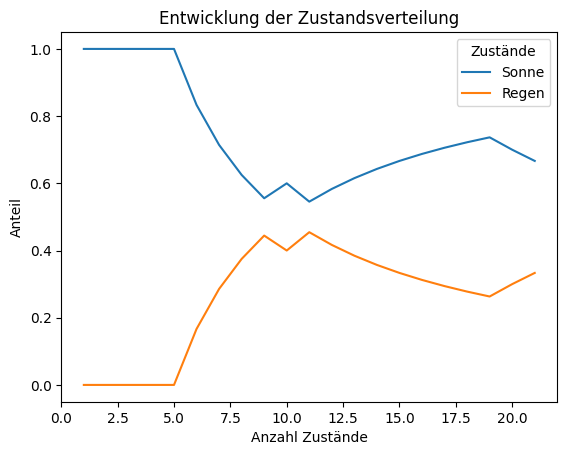

In [10]:
### CODEBLOCK B
import pandas as pd
import matplotlib.pyplot as plt

def plot_state_percentages(history):
    """
    Plottet den prozentualen Verlauf beliebig vieler Zustände aus einer History-Liste.
    """
    unique_states = list(dict.fromkeys(history))  # Reihenfolge beibehalten
    counts = {state: 0 for state in unique_states}
    percentages = {state: [] for state in unique_states}

    for i, zustand in enumerate(history, 1):
        counts[zustand] += 1
        for state in unique_states:
            percentages[state].append(counts[state] / i)

    df = pd.DataFrame(percentages)
    df.index = np.arange(1, len(history)+1)
    df.index.name = "Anzahl Zustände"
    df.plot()
    plt.xlabel("Anzahl Zustände")
    plt.ylabel("Anteil")
    plt.title("Entwicklung der Zustandsverteilung")
    plt.legend(title="Zustände")
    plt.show()

plot_state_percentages(history)

<div class="alert alert-success">
Führen Sie die zwei obigen Code-Blöcke (A und B) zwei weitere Male aus. Ändert sich die Grafik? Weshalb?
</div>

**Antwort**:...

<div class="alert alert-success">

Führen Sie die zwei obigen Code-Blöcke (A und B) statt für 20 Schritte für **2000 Schritte** einige Male aus. Wie verändert sich die Verteilung der Zustände?
</div>

**Antwort**:...

# Zusatzaufgaben

<div class="alert alert-success">
Wie gross ist die Wahrscheinlichkeit, dass der Schüler nach drei Nutzungen bei Instagram landet, wenn er mit Tiktok startet?
</div>

In [11]:
# IHR CODE HIER

In [12]:
# Startzustand: 100% WhatsApp
pi0 = np.array([1, 0])

# Nach einer Nutzung
pi1 = pi0 @ Q

# Nach zwei Nutzungen
pi2 = pi1 @ Q

# Nach drei Nutzungen
pi3 = pi2 @ Q

# Wahrscheinlichkeit für Instagram nach zwei Nutzungen (Index 1)
print("Wahrscheinlichkeit, nach zwei Nutzungen bei Instagram zu landen:", pi3[1])

Wahrscheinlichkeit, nach zwei Nutzungen bei Instagram zu landen: 0.46799999999999997


<div class="alert alert-success">
Führen Sie eine Zufallssimulation für die Zustände "Instagram" und "TikTok" durch. Visualisieren Sie das Resultat der Simulationen.
</div>

In [ ]:
# IHR CODE HIER